In [ ]:
#sequential neural network model -- here using validation set to get more accuracy 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
data_train_path=r"C:\Users\gokul\Desktop\DeepLearning Projects\Fruits_Vegetables\Fruits_Vegetables\train"
data_test_path=r"C:\Users\gokul\Desktop\DeepLearning Projects\Fruits_Vegetables\Fruits_Vegetables\test"
data_val_path=r"C:\Users\gokul\Desktop\DeepLearning Projects\Fruits_Vegetables\Fruits_Vegetables\validation"

In [21]:
img_width=180
img_height=180


In [22]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False)

Found 3115 files belonging to 36 classes.


In [23]:
data_cat=data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [26]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                     image_size=(img_width,img_height),
                                                     batch_size=32,
                                                     shuffle=False,
                                                     validation_split=False)


Found 351 files belonging to 36 classes.


In [27]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      image_size=(img_width,img_height),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 359 files belonging to 36 classes.


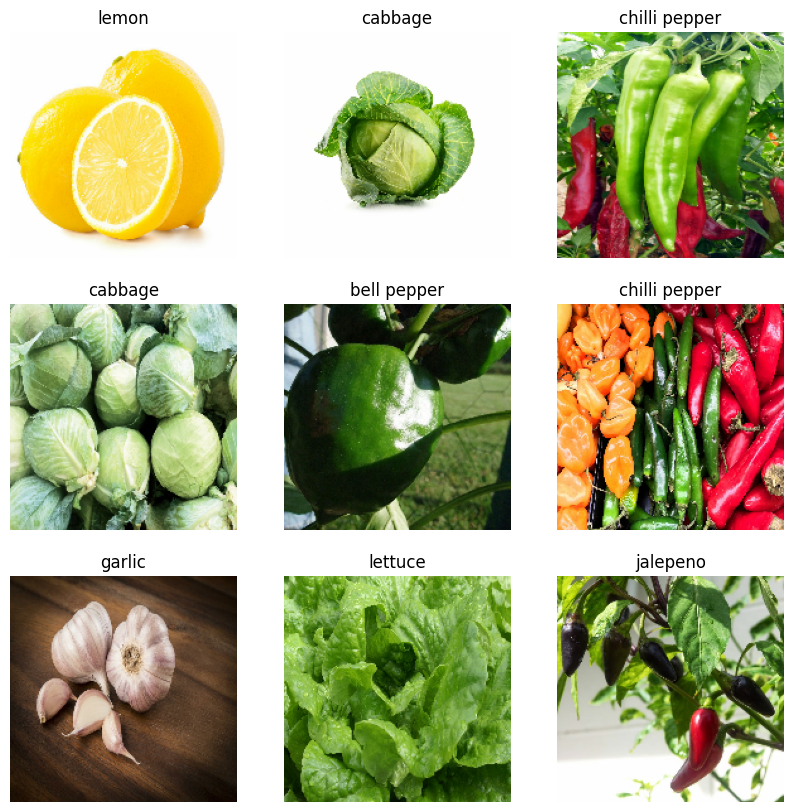

In [32]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [69]:
  from tensorflow.keras.models import Sequential

In [70]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [71]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [72]:
epoch_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epoch_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 262ms/step - accuracy: 0.0499 - loss: 3.8359 - val_accuracy: 0.3162 - val_loss: 2.7346
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.2823 - loss: 2.6608 - val_accuracy: 0.5442 - val_loss: 1.7950
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.4504 - loss: 1.9407 - val_accuracy: 0.7749 - val_loss: 0.8787
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step - accuracy: 0.6104 - loss: 1.3369 - val_accuracy: 0.8832 - val_loss: 0.5054
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.7759 - loss: 0.7912 - val_accuracy: 0.8803 - val_loss: 0.4706
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.8664 - loss: 0.4877 - val_accuracy: 0.9316 - val_loss: 0.3787
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.9070 - loss: 0.3652 - val_accuracy: 0.9430 - val_loss: 0.3654
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step - accuracy: 0.9239 - loss: 0.2985 - val_accu

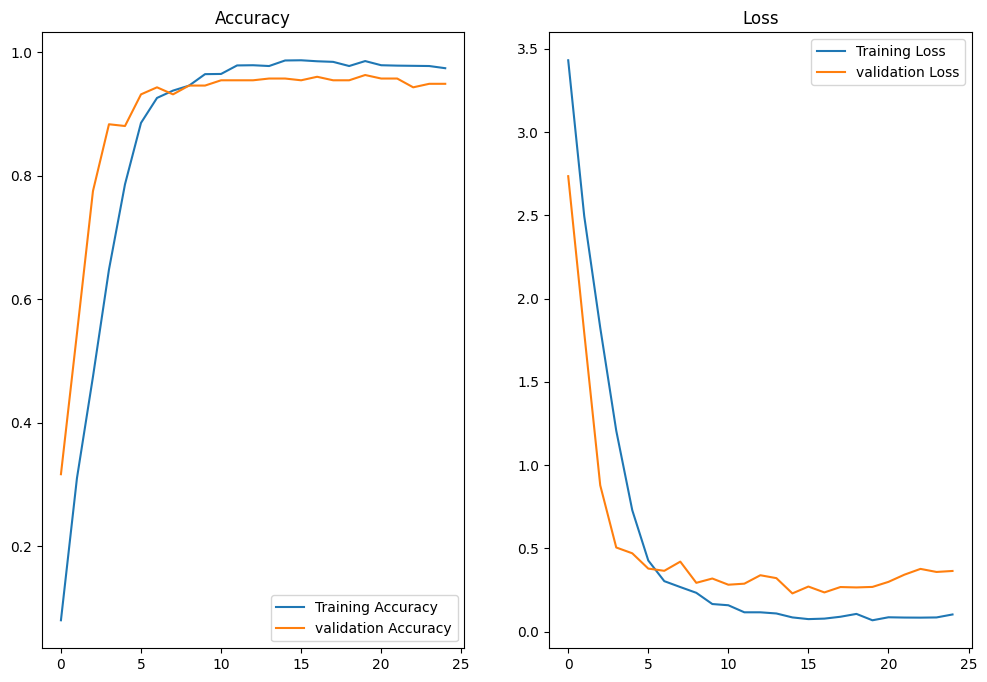

In [83]:
epochs_range=range(epoch_size)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history["accuracy"],label="Training Accuracy")
plt.plot(epochs_range,history.history["val_accuracy"],label="validation Accuracy")
plt.title("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history["loss"],label="Training Loss")
plt.plot(epochs_range,history.history["val_loss"],label="validation Loss")
plt.title("Loss")
plt.legend()

In [109]:
image=r"C:\Users\gokul\Desktop\DeepLearning Projects\apple3.jpg"
image=tf.keras.utils.load_img(image,target_size=(img_width,img_height))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [110]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [111]:
score=tf.nn.softmax(predict)

In [112]:
print("friut in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

friut in image is apple with accuracy of 85.65


In [113]:
model.save("image_clssify.keras")